In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

from directory import Directory


#### Defining the directory to analyze

In [17]:
dir = Directory(r'C:\Users\BLUO\Downloads\report\tests\resources\directory_test_files')

#### Exploring the CSV report

In [71]:
split_metadata = True

data = [file.processor.__dict__ for file in dir.get_files()]
if split_metadata:
    data = pd.json_normalize(data, max_level=1, sep='_')
main = pd.DataFrame(data)
main

,file_path,open_file,file_name,extension,size,modification_time,access_time,creation_time,parent_directory,is_file,...,metadata_subject,metadata_date,metadata_sender,metadata_active_sheet,metadata_sheet_names,metadata_data,metadata_creator,metadata_num_files,metadata_file_types,metadata_file_names
0,C:\Users\BLUO\Downloads\report\tests\resources...,True,2021_Census_English.csv,.csv,5384414,1.705333e+09,1.705503e+09,1.705333e+09,C:\Users\BLUO\Downloads\report\tests\resources...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C:\Users\BLUO\Downloads\report\tests\resources...,True,ArtificialNeuralNetworksForBeginners.pdf,.pdf,221266,1.705333e+09,1.705503e+09,1.705333e+09,C:\Users\BLUO\Downloads\report\tests\resources...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C:\Users\BLUO\Downloads\report\tests\resources...,True,ArtificialNeuralNetworksForBeginners_Locked.pdf,.pdf,222102,1.705333e+09,1.705503e+09,1.705333e+09,C:\Users\BLUO\Downloads\report\tests\resources...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C:\Users\BLUO\Downloads\report\tests\resources...,True,government_of_canada_wikipedia.txt,.txt,39357,1.705333e+09,1.705503e+09,1.705333e+09,C:\Users\BLUO\Downloads\report\tests\resources...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C:\Users\BLUO\Downloads\report\tests\resources...,True,Health - Canada.ca.html,.html,168865,1.705333e+09,1.705503e+09,1.705333e+09,C:\Users\BLUO\Downloads\report\tests\resources...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,C:\Users\BLUO\Downloads\report\tests\resources...,True,HealthCanadaOverviewFromWikipedia_Locked.docx,.docx,19456,1.705333e+09,1.705503e+09,1.705333e+09,C:\Users\BLUO\Downloads\report\tests\resources...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C:\Users\BLUO\Downloads\report\tests\resources...,True,Health_Canada_logo.png,.png,4125,1.705333e+09,1.705503e+09,1.705333e+09,C:\Users\BLUO\Downloads\report\tests\resources...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,C:\Users\BLUO\Downloads\report\tests\resources...,True,Microsoft Copilot Presentation - Copy.pptx,.pptx,100174789,1.705333e+09,1.705503e+09,1.705333e+09,C:\Users\BLUO\Downloads\report\tests\resources...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,C:\Users\BLUO\Downloads\report\tests\resources...,True,Test Email.msg,.msg,76800,1.705333e+09,1.705503e+09,1.705333e+09,C:\Users\BLUO\Downloads\report\tests\resources...,True,...,Test Email,"Mon, 18 Sep 2023 13:57:16 -0400","""Burnett, Taylen (HC/SC)"" <Taylen.Burnett@hc-s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,C:\Users\BLUO\Downloads\report\tests\resources...,True,Test_excel_file.xlsx,.xlsx,11885,1.705333e+09,1.705503e+09,1.705333e+09,C:\Users\BLUO\Downloads\report\tests\resources...,True,...,NaN,NaN,NaN,Sheet3,"[Sheet1, Sheet2, Sheet3]","{'Sheet1': [(1, 2, 3, None, None), ('a', 'b', ...","Burnett, Taylen (HC/SC)",NaN,NaN,NaN


In [79]:
df = main.copy()

df.columns = df.columns.str.replace('metadata_', '')

for col in ['reader', 'open_file', 'lines', 'words', 'text', 'docstrings', 'imports']:
    if col in df.columns:
        df = df.drop(col, axis=1)

df['size'] = df['size'] / 1e6

for boolean in ['is_file', 'is_symlink']:
    df[boolean] = df[boolean].astype(int)

for time in ['modification_time', 'access_time', 'creation_time']:
    df[time] = pd.to_datetime(df[time].round(0), unit='s')

df.replace('', 'N/A', inplace=True)
df.columns = df.columns.str.replace('_', ' ')
df.columns = df.columns.str.title()
df.rename(columns={'Size': 'Size (MB)'}, inplace=True)

# df[df['Extension'].isin(['.csv', '.pdf'])]
df

,File Path,File Name,Extension,Size (MB),Modification Time,Access Time,Creation Time,Parent Directory,Is File,Is Symlink,...,Subject,Date,Sender,Active Sheet,Sheet Names,Data,Creator,Num Files,File Types,File Names
0,C:\Users\BLUO\Downloads\report\tests\resources...,2021_Census_English.csv,.csv,5.384414,2024-01-15 15:33:58,2024-01-17 14:55:33,2024-01-15 15:33:58,C:\Users\BLUO\Downloads\report\tests\resources...,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C:\Users\BLUO\Downloads\report\tests\resources...,ArtificialNeuralNetworksForBeginners.pdf,.pdf,0.221266,2024-01-15 15:33:58,2024-01-17 14:55:33,2024-01-15 15:33:58,C:\Users\BLUO\Downloads\report\tests\resources...,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C:\Users\BLUO\Downloads\report\tests\resources...,ArtificialNeuralNetworksForBeginners_Locked.pdf,.pdf,0.222102,2024-01-15 15:33:58,2024-01-17 14:55:33,2024-01-15 15:33:58,C:\Users\BLUO\Downloads\report\tests\resources...,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C:\Users\BLUO\Downloads\report\tests\resources...,government_of_canada_wikipedia.txt,.txt,0.039357,2024-01-15 15:33:59,2024-01-17 14:55:33,2024-01-15 15:33:59,C:\Users\BLUO\Downloads\report\tests\resources...,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C:\Users\BLUO\Downloads\report\tests\resources...,Health - Canada.ca.html,.html,0.168865,2024-01-15 15:33:58,2024-01-17 14:55:33,2024-01-15 15:33:58,C:\Users\BLUO\Downloads\report\tests\resources...,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,C:\Users\BLUO\Downloads\report\tests\resources...,HealthCanadaOverviewFromWikipedia_Locked.docx,.docx,0.019456,2024-01-15 15:33:58,2024-01-17 14:55:33,2024-01-15 15:33:58,C:\Users\BLUO\Downloads\report\tests\resources...,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C:\Users\BLUO\Downloads\report\tests\resources...,Health_Canada_logo.png,.png,0.004125,2024-01-15 15:33:58,2024-01-17 14:55:33,2024-01-15 15:33:58,C:\Users\BLUO\Downloads\report\tests\resources...,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,C:\Users\BLUO\Downloads\report\tests\resources...,Microsoft Copilot Presentation - Copy.pptx,.pptx,100.174789,2024-01-15 15:33:59,2024-01-17 14:55:34,2024-01-15 15:33:59,C:\Users\BLUO\Downloads\report\tests\resources...,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,C:\Users\BLUO\Downloads\report\tests\resources...,Test Email.msg,.msg,0.076800,2024-01-15 15:33:59,2024-01-17 14:55:34,2024-01-15 15:33:59,C:\Users\BLUO\Downloads\report\tests\resources...,1,0,...,Test Email,"Mon, 18 Sep 2023 13:57:16 -0400","""Burnett, Taylen (HC/SC)"" <Taylen.Burnett@hc-s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,C:\Users\BLUO\Downloads\report\tests\resources...,Test_excel_file.xlsx,.xlsx,0.011885,2024-01-15 15:33:59,2024-01-17 14:55:34,2024-01-15 15:33:59,C:\Users\BLUO\Downloads\report\tests\resources...,1,0,...,NaN,NaN,NaN,Sheet3,"[Sheet1, Sheet2, Sheet3]","{'Sheet1': [(1, 2, 3, None, None), ('a', 'b', ...","Burnett, Taylen (HC/SC)",NaN,NaN,NaN


In [80]:
df.to_csv('./report.csv')

#### Filtering out the data of interest

In [ ]:
fil = pd.DataFrame([{k: v for k, v in file.processor.__dict__.items() if k in ['extension', 'size']} for file in dir.get_files()])
fil['count'] = 1
df = fil.groupby('extension').sum()#.reset_index()
df

,size,count
extension,,
.csv,5384414,1
.docx,19456,1
.html,168865,1
.msg,76800,1
.pdf,443368,2
.png,4125,1
.pptx,100248831,3
.rtf,103257,1
.txt,39357,1


#### Exporting the filtered data to CSV

In [ ]:
df.to_csv('./analytics.csv')

#### Visualizing the filtered data

Text(0.5, 1.0, 'File types by Count and Size (mb)')

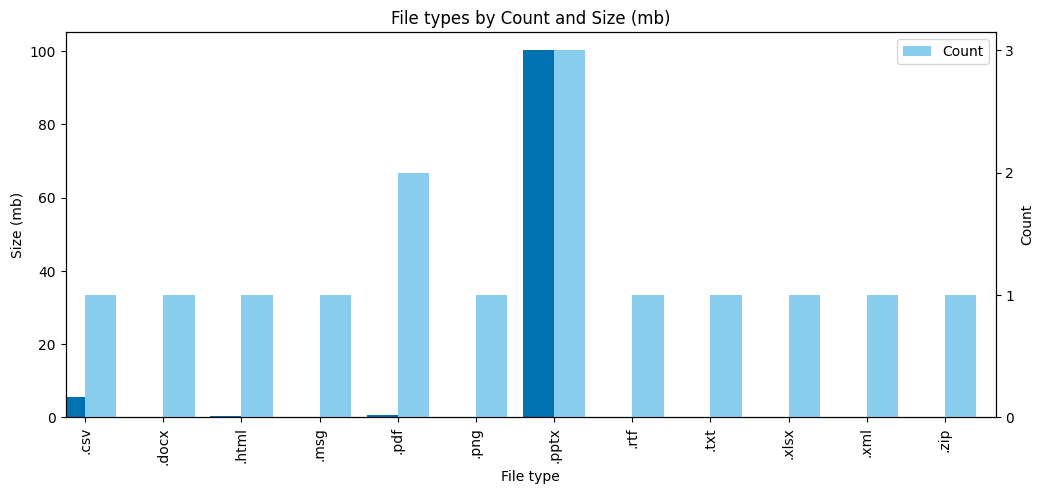

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax2.yaxis.get_major_locator().set_params(integer=True)

width = 0.4

(df['size']/1e6).plot(kind='bar', color='#0072b2', ax=ax, width=width, position=1, label='Size (mb)')
df['count'].plot(kind='bar', color='#88ccee', ax=ax2, width=width, position=0, label='Count')

ax.set_ylabel('Size (mb)')
ax2.set_ylabel('Count')
ax.set_xlabel('File type')

plt.legend()
plt.title('File types by Count and Size (mb)')


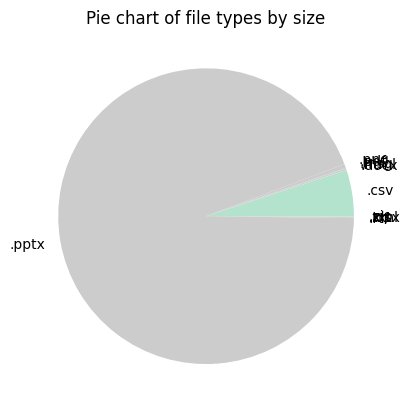

In [ ]:
import matplotlib.pyplot as plt

labels = df.index
sizes = df['size']

cmap = plt.get_cmap("Pastel2")

plt.title('Pie chart of file types by size')
plt.pie(sizes, labels=labels, colors=cmap(np.arange(11)*4))
plt.show()

In [1]:
from directory import Directory
d = Directory('../tests/resources/directory_test_files')

In [2]:
# d.generate_analytics(report_file='./analytics.csv')
d.generate_report(report_file='./report.csv', migrate_filters={'extensions': ['.txt', '.pptx', '.docx']})

Generating Report: 100%|██████████| 15/15 [00:09<00:00,  1.55file/s]


In [10]:
lst = set(sum([list(file.metadata.keys()) for file in d.get_files()], []))

In [14]:
pst = []
pst.extend(list(lst))
pst

['text',
 'num_slides',
 'file_types',
 'sender',
 'lines',
 'sheet_names',
 'mode',
 'creator',
 'num_files',
 'words',
 'empty_cells',
 'file_names',
 'num_cells',
 'num_words',
 'original_format',
 'num_rows',
 'num_lines',
 'encoding',
 'height',
 'active_sheet',
 'subject',
 'num_cols',
 'last_modified_by',
 'has_password',
 'width',
 'date',
 'data',
 'author']